### Ciclo Ideal de Refrigeração por Compressão de Vapor

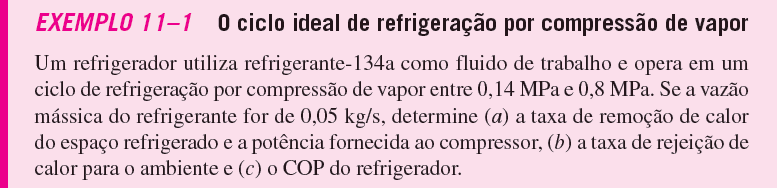

In [2]:
from IPython.display import Image
Image("Enunciado 11-1.png")


### **Exemplo:** Um refrigerador utiliza refrigerante R134a como fluido de trabalho e opera em um ciclo de refrigeração por compressão de vapor entre $0,14MPa$ e $0,8MPa$. Se a vazão mássica do refrigerante for de $0,05 kg/s$, determine (a) a taxa de remoção de calor do espaço refrigerado e a potência forneccida ao compressor, (b) a taxa de rejeição de calor para o ambiente e (c) o COP do refrigerador.

Para a solução do problema devemos analisar o diagrama T-s para o ciclo ideal de refrigeração. Observe que a vazão mássica está especificada ($ \dot{m}=0,05m^3/s $) e os limites de pressão são $ 0,14MPa $  na entrada e $0,8MPa$ na saída do compressor. Podemos construir o diagrama abaixo, desprezando as perdas de carga no evaporador e condensador, considerando o compressor isentrópico e a válvula de expansão isentálpica.

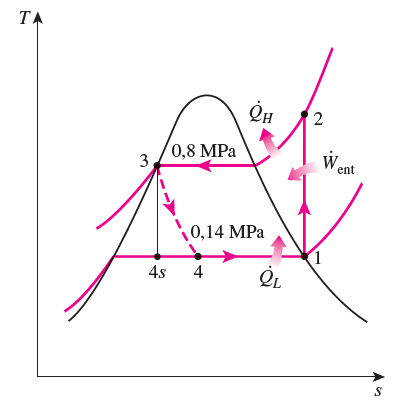

In [1]:
from IPython.display import Image
Image("Ciclo.png")

## Solução

Para a solução do problema precisamos obter as propriedades do fluido de trabalho (R134a) nos estados de interesse. para isso vamos usar a biblioteca de propriedades de fluidos CoolProp (http://www.coolprop.org) e definir o R134a como fluido refrigerante.

In [165]:
from CoolProp import CoolProp as cp
from sympy import pretty_print as latex
fluido= 'R134a'
cp.set_reference_state(fluido,'ASHRAE') # Definindo o padrão ASHRAE de referência para as propriedades termodinâmicas.
m=0.05 # vazão mássica dada no enunciado.

Para o estado 1, temos vapor saturado a $P_1=0,14MPa$:


In [214]:
P1=0.14 #Unidade em MPa, a conversão para Pa será feita na chamada à função abaixo.
Q1=1    # Título igual a um para vapor saturado
h1 = cp.PropsSI('H', 'P', P1 * 1E6, 'Q', Q1, fluido) * 1E-3 #Determinando a entalpia e convertendo para kJ/kg
s1 = cp.PropsSI('S', 'P', P1 * 1E6, 'Q', Q1, fluido) * 1E-3 #Determinando a entropia e convertendo para kJ/kg
T1 = cp.PropsSI('T', 'P', P1 * 1E6, 'Q', Q1, fluido)        #Determinando a temperatura em K
print('h1= {:.3f} kJ/kg:'.format(h1))
print('s1= {:.3f} kJ/kg:'.format(s1))
print('T1= {:.3f} °C:'.format(T1-273.15))

h1= 239.176 kJ/kg:
s1= 0.945 kJ/kg:
T1= -18.760 °C:


Para o estado 2, temos vapor superaquecido a $P_2=0,8MPa$ e $s_2=s_1$ (Compressor isentrópico):


In [232]:
P2 = 1.9 #Unidade em MPa, a conversão para Pa será feita na chamada à função abaixo.
s2 = s1    # Título igual a um para vapor saturado
h2 = cp.PropsSI('H', 'P', P2 * 1E6, 'S', s2*1E3, fluido) * 1E-3 #Determinando a entalpia e convertendo para kJ/kg
T2 = cp.PropsSI('T', 'P', P2 * 1E6, 'S', s2*1E3, fluido)        #Determinando a temperatura em K
print('h2= {:.3f} kJ/kg:'.format(h2))
print('T2= {:.3f} kJ/kg:'.format(T2-273.15))

h2= 293.811 kJ/kg:
T2= 75.449 kJ/kg:


Do diagrama T-s, observamos que no estado 3 temos líquido saturado a $P_3=0,8MPa$:


In [233]:
P3=P2 #Unidade em MPa, a conversão para Pa será feita na chamada à função abaixo.
Q3=0    # Título igual a zero para líquido saturado
h3 = cp.PropsSI('H', 'P', P3 * 1E6, 'Q', Q3, fluido) * 1E-3 #Determinando a entalpia e convertendo para kJ/kg
s3 = cp.PropsSI('S', 'P', P3 * 1E6, 'Q', Q3, fluido) * 1E-3 #Determinando a entalpia e convertendo para kJ/kg
T3 = cp.PropsSI('T', 'P', P3 * 1E6, 'Q', Q3, fluido)        #Determinando a temperatura em K
print('h3= {:.3f} kJ/kg:'.format(h3))
print('T3= {:.3f} °C:'.format(T3-273.15))

h3= 148.010 kJ/kg:
T3= 65.234 °C:


E, como a válvula de expansão é isentálpica, $h_4=h_3$:


In [234]:
h4=h3 #Válvula isentálpica
T4=T1
P4=P1
s4 = cp.PropsSI('S', 'H', h4* 1E3, 'P', P4*1E6, fluido) * 1E-3 #Determinando a entalpia e convertendo para kJ/kg
print('h4= {:.3f} kJ/kg:'.format(h4))
print('s4= {:.3f} kJ/kg:'.format(s4))
print('T4= {:.3f} kJ/kg:'.format(T4-273.15))

h4= 148.010 kJ/kg:
s4= 0.586 kJ/kg:
T4= -18.760 kJ/kg:


Para continuar a solução do problemas, vamos aplicar a equação da energia para volume de controle para cada um dos quatro componentes do ciclo, considerando ainda regime permanente ($\frac{dE_{vc}}{dt}=0$) e desprezando-se a variação de energias cinética e potencial. Assim, para o evaporador $\dot{W}=0$ e a equação da energia se reduz a: 
$\dot{Q_L}=\dot{m}(h_1-h_4)$

In [235]:
QL=m*(h1-h4)
print('QL = {:.3f} kW:'.format(QL))

QL = 4.558 kW:


Aplicando a equação da energia para volume de controle para o compressor $\dot{Q}=0$ obtemos: 
$\dot{W_{ent}}=\dot{m}(h_2-h_1)$

In [236]:
W=m*(h2-h1)
print('W = {:.3f} kW:'.format(W))

W = 2.732 kW:


Aplicando a equação da energia para volume de controle para o condensador $\dot{Q}=0$ obtemos: 
$\dot{Q_{H}}=\dot{m}(h_2-h_3)$

In [237]:
QH=m*(h2-h3)
print('QH = {:.3f} kW'.format(QH))

QH = 7.290 kW


Finalmente, obtemos o coeficiente de desempenho: $COP=\frac{\dot{Q_L}}{\dot{W_{ent}}}$:

In [238]:
COP=QL/W
print('COP = {:.3f}'.format(COP))

COP = 1.669


## Diagrama T-s - Ciclo de Refrigeração

#### Processos termodinâmicos considerados:

- Processo 1 a 2 : Compressão isentrópica (s2 = s1); <br> 
- Processo 2 a 3 : Condensação isobárica  (P3 = P2); <br>
- Processo 3 a 4 : Expansão isentálpica   (h4 = h3); <br>
- Processo 4 a 1 : Evaporação isobárica   (P4 = P1).

Para plotar o Diagrama T-s, precisamos utilizar a biblioteca matplotlib para mostrar o gráfico e a biblioteca numpy para poder gerar os vetores que serão plotados.

5 -Construindo o diagrama T - s:

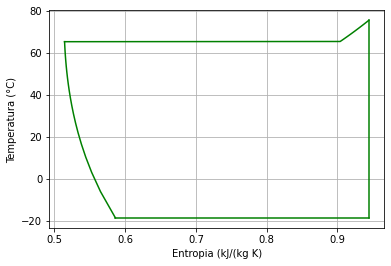

In [239]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure() # Define a saída do gráfico

## Curvas de saturação de líquido (Q=0) e vapor (Q=1) para temperatura variando entre 10°C e 647.096K (T crítica)
npt = np.linspace(-20,101.06,200) # Gera um vetor com 200 elementos para o intervalo de temperatura 
svap = [s for s in [cp.PropsSI('S', 'T', j + 273.15, 'Q', 1, fluido) * 1E-3 for j in npt]]
sliq = [s for s in [cp.PropsSI('S', 'T', j + 273.15, 'Q', 0, fluido) * 1E-3 for j in npt]]
#plt.plot(svap, npt, 'r-')
#plt.plot(sliq, npt, 'b-')

### Conjunto de processos  (s,T)

T12 = [T1-273.15, T2-273.15] 
s12 = [s1, s2]

T23=np.linspace(T2-273.15,T3-273.16,100)
s23 = [s for s in [cp.PropsSI('S', 'T', j+273.15 , 'P', P3*1E6, fluido) * 1E-3 for j in T23]]

P34 = np.linspace(P3,P4,20)
T34 = [T-273.15 for T in [cp.PropsSI('T', 'H', h3*1E3, 'P', j*1E6, fluido)  for j in P34]]
s34 = [s for s in [cp.PropsSI('S', 'H', h3*1E3, 'P', j*1E6, fluido) * 1E-3 for j in P34]]

T41 = [T4-273.15, T1-273.15]
s41 = [s4,s1]

plt.plot(s12,T12,'g')
plt.plot(s23,T23,'g')
plt.plot(s34,T34,'g')
plt.plot(s41,T41,'g')


plt.xlabel('Entropia (kJ/(kg K)')
plt.ylabel('Temperatura (°C)')
plt.savefig('Rankine.png', transparent = True)
plt.grid()
plt.show()

In [249]:
from bokeh.plotting import *

# Criando um arquivo estático em html
output_file("Rankine.html")

output_notebook()

p = figure(plot_width=600, plot_height=600)

p.title.text = 'Ciclo Ideal de Rankine'
p.title.align = 'center'
p.title.text_color = 'black'
p.title.text_font_size = '30px'
p.xaxis[0].axis_label = 'Entropia (kJ/(kg K)'
p.yaxis[0].axis_label = 'Temperatura (°C)'


p.line(sliq, npt, legend_label = 'Curva de Líquido Saturado', line_width = 2, color = 'blue')
p.line(svap, npt, legend_label = 'Curva de Vapor Saturado', line_width = 2, color = 'red')


p.line(s12, T12, line_width = 2, color = 'green')
p.line(s23, T23, line_width = 2, color = 'green')
p.line(s34, T34, line_width = 2, color = 'green')
p.line(s41, T41, line_width = 2, color = 'green')

# Exibir o Gráfico
show(p)

Loading BokehJS ...